# Using geometry functions

This notebook uses the `arcgis.geometry` module to compute the length of a path that the user draws on the map.

The particular scenario is of a jogger who runs in the Central Park in New York (without gizmos like GPS watches to distract him), and wants a rough estimate of his daily runs based on the path he takes. The notebook starts out with a satellite map of Central Park in New York:

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths

In [2]:
gis = GIS()

In [3]:
map1 = gis.map()
map1.basemap = "satellite"


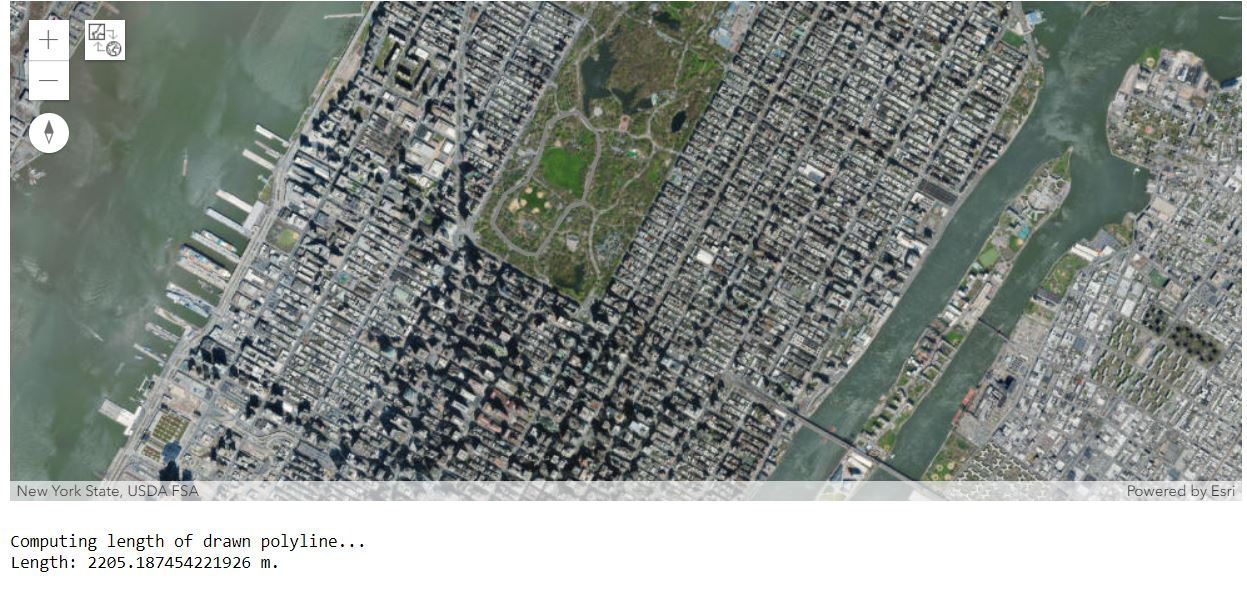

In [4]:
map1

In [5]:
map1.height = '650px'

In [6]:
location = geocode("Central Park, New York")[0]
map1.extent = location['extent']

In [7]:
map1.zoom = 14

We want the user to draw a freehand polyline to indicate the paths that he takes for his runs. When the drawing operation ends, we use the GIS's Geometry service to compute the length of the drawn path. We can do this by adding an event listener to the map widget that gets called when drawing is completed (i.e. on_draw_end). The event listener then computes the geodesic length of the drawn geometry using the geometry service and prints it out:

In [8]:
# Define the callback function that computes the length.
def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " m.")

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
map1.on_draw_end(calc_dist)

In [9]:
map1.draw("polyline")

Now draw a polygon on the map representing the route taken by the jogger

In [10]:
map1.clear_graphics()